# 데이터 분석 프로젝트

## 주제 : 주거
### 1인가구 데이터와 여가시간 체육활동에 관한 데이터 활용
### 여가시간 체육활동에 동반자를 구해주는 서비스

In [88]:
#필요 라이브러리 가져오기
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [89]:
#데이터 파일 위치 가져오기
from glob import glob
file = glob('*.json')
file

['1인가구 데이터.json',
 '꾸준히 참여하지않는 이유(서울).json',
 '꾸준히 참여하지않는 이유(전국).json',
 '여가시간 체육활동 참여이유(2017).json',
 '여가시간 체육활동 참여이유(2018).json',
 '여가시간 체육활동 참여이유(2019).json']

### 1인가구 증가

In [90]:
df_home = pd.read_json('1인가구 데이터.json')
df_home

,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18
행정구역별,전국,서울특별시,부산광역시,대구광역시,인천광역시,광주광역시,대전광역시,울산광역시,세종특별자치시,경기도,강원도,충청북도,충청남도,전라북도,전라남도,경상북도,경상남도,제주특별자치도
2017,28.6,31.0,28.7,27.4,24.7,29.8,31.5,25.1,30.2,24.4,32.2,31.0,31.1,31.2,31.6,31.9,28.6,28.6
2018,29.3,32.0,29.7,28.2,25.2,30.2,32.5,25.6,30.0,25.2,32.8,31.8,31.8,31.7,31.9,32.3,29.1,29.4
2019,30.2,33.4,30.7,29.4,26.6,31.1,33.7,26.5,30.1,26.3,32.9,32.9,32.5,32.3,32.1,32.7,29.6,29.7
2020,31.7,34.9,32.4,30.9,28.3,32.4,36.3,27.7,31.3,27.6,35.0,34.8,34.2,33.8,33.7,34.4,30.9,31.1
2021,33.4,36.8,34.0,32.7,30.0,34.5,37.6,29.5,31.5,29.2,36.3,36.3,35.8,35.7,35.3,36.0,32.7,32.7


In [91]:
df_home = df_home.transpose()

In [92]:
df_home

,행정구역별,2017,2018,2019,2020,2021
1,전국,28.6,29.3,30.2,31.7,33.4
2,서울특별시,31.0,32.0,33.4,34.9,36.8
3,부산광역시,28.7,29.7,30.7,32.4,34.0
4,대구광역시,27.4,28.2,29.4,30.9,32.7
5,인천광역시,24.7,25.2,26.6,28.3,30.0
6,광주광역시,29.8,30.2,31.1,32.4,34.5
7,대전광역시,31.5,32.5,33.7,36.3,37.6
8,울산광역시,25.1,25.6,26.5,27.7,29.5
9,세종특별자치시,30.2,30.0,30.1,31.3,31.5
10,경기도,24.4,25.2,26.3,27.6,29.2


In [93]:
df_seoul = df_home[df_home['행정구역별'] == '서울특별시']
df_seoul.drop(labels = '행정구역별', axis = 1, inplace = True)
df_seoul

C:\Users\SAMSUNG\AppData\Local\Temp\ipykernel_15020\4098847089.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_seoul.drop(labels = '행정구역별', axis = 1, inplace = True)


,2017,2018,2019,2020,2021
2,31.0,32.0,33.4,34.9,36.8


In [94]:
df_seoul = df_seoul.astype('float')
df_seoul.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1 entries, 2 to 2
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   2017    1 non-null      float64
 1   2018    1 non-null      float64
 2   2019    1 non-null      float64
 3   2020    1 non-null      float64
 4   2021    1 non-null      float64
dtypes: float64(5)
memory usage: 48.0 bytes


### 서울시 1인가구 증가율 시각화

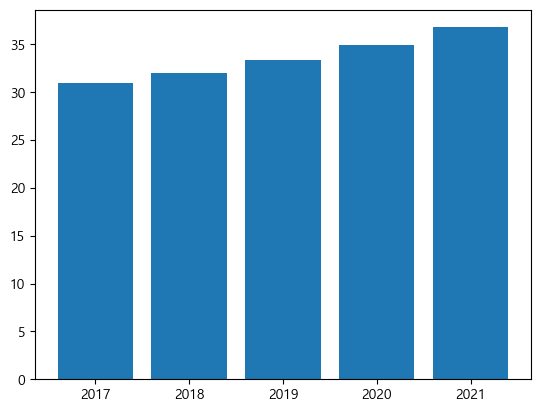

In [95]:
#글꼴 설정
plt.rc('font', family = 'Malgun Gothic')
#그래프 그리기
plt.bar(df_seoul.columns, df_seoul.loc[2])
plt.show()

### 여가 시간 체육활동 참여이유

In [96]:
df_2017 = pd.read_json('여가시간 체육활동 참여이유(2017).json')
df_2018 = pd.read_json('여가시간 체육활동 참여이유(2018).json')
df_2019 = pd.read_json('여가시간 체육활동 참여이유(2019).json')

In [97]:
df_2017 = df_2017.transpose().set_index('이유')
df_2018 = df_2018.transpose().set_index('이유')
df_2019 = df_2019.transpose().set_index('이유')

In [98]:
df_2017_seoul = pd.DataFrame(df_2017['서울'])
df_2017_seoul.columns = ['비율']
df_2017_seoul

,비율
이유,
건강 유지 및 체력증진,72.2
체중조절 및 체형관리,49.6
스트레스 해소,39.5
여가 선용,41.3
개인의 즐거움,22.4
대인관계 및 사교,15.6


In [99]:
df_2018_seoul = pd.DataFrame(df_2018['서울'])
df_2018_seoul.columns = ['비율']
df_2018_seoul

,비율
이유,
건강 유지 및 체력증진,75.7
체중조절 및 체형관리,52.4
스트레스 해소,41.2
여가 선용,42.2
개인의 즐거움,24.1
대인관계 및 사교,19.3


In [100]:
df_2019_seoul = pd.DataFrame(df_2019['서울'])
df_2019_seoul.columns = ['비율']
df_2019_seoul

,비율
이유,
건강 유지 및 체력증진,71
체중조절 및 체형관리,48.5
스트레스 해소,36.5
여가 선용,40.5
개인의 즐거움,36.3
대인관계 및 사교,19.7


In [101]:
df_2017_seoul = df_2017_seoul.astype('float')
df_2018_seoul = df_2018_seoul.astype('float')
df_2019_seoul = df_2019_seoul.astype('float')

### 여가시간 체육활동 참여이유 시각화

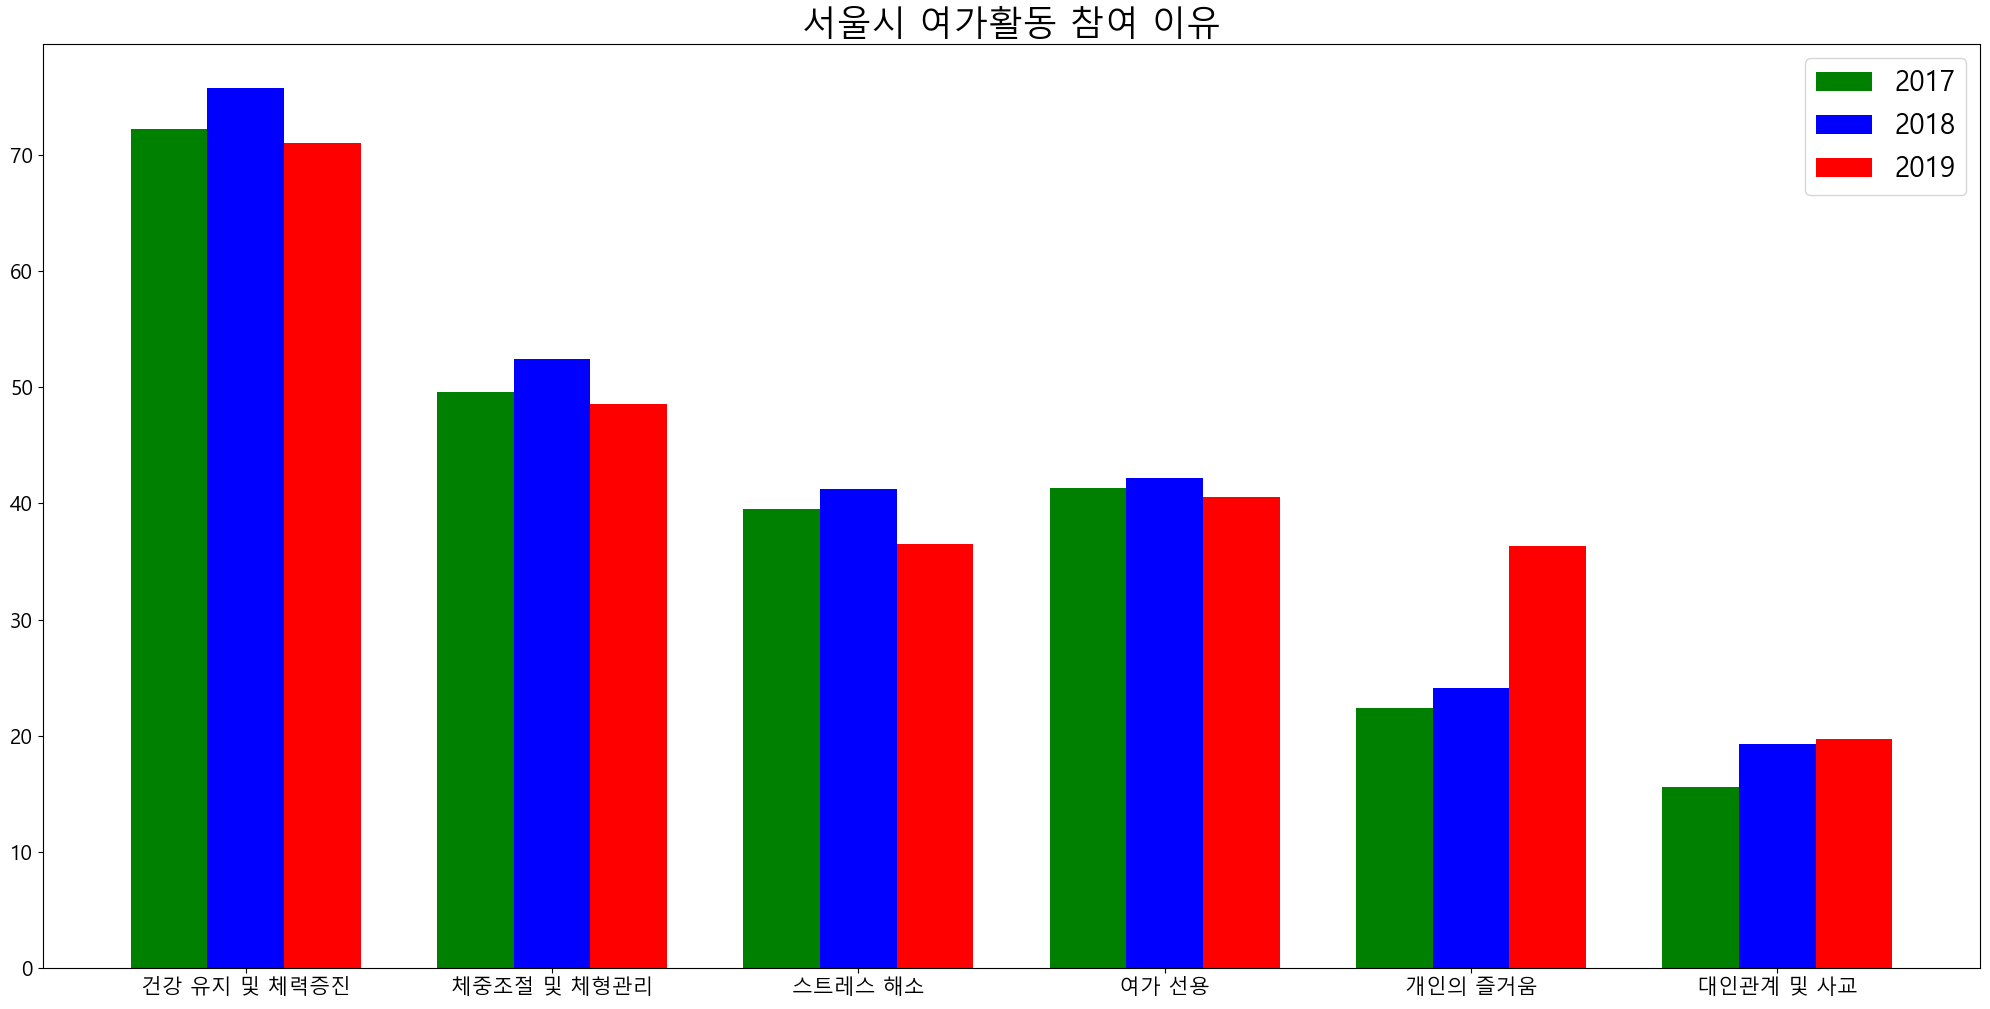

In [104]:
fig = plt.figure(figsize = (25,12))

x1 = [1,3,5,7,9,11]
x2 = [1.5, 3.5, 5.5, 7.5, 9.5, 11.5]
x3 = [2, 4, 6, 8, 10, 12]

ticklabel = df_2018_seoul.index
plt.xticks(x2,ticklabel, fontsize=15)
plt.yticks(fontsize=15)
plt.title('서울시 여가활동 참여 이유', fontsize = 25)
plt.yticks(fontsize = 15)
plt.bar(x1, df_2017_seoul['비율'].values, color='g', width= 0.5 , label = '2017')
plt.bar(x2, df_2018_seoul['비율'].values, color='b', width= 0.5, label = '2018')
plt.bar(x3, df_2019_seoul['비율'].values, color='r', width = 0.5, label = '2019')
plt.legend(fontsize = 20)

plt.show()

In [105]:
df_seoul_act = pd.concat([df_2017_seoul,df_2018_seoul,df_2019_seoul], axis = 1)
df_seoul_act.columns = ['2017(%)','2018(%)','2019(%)']
df_seoul_act

,2017(%),2018(%),2019(%)
이유,,,
건강 유지 및 체력증진,72.2,75.7,71.0
체중조절 및 체형관리,49.6,52.4,48.5
스트레스 해소,39.5,41.2,36.5
여가 선용,41.3,42.2,40.5
개인의 즐거움,22.4,24.1,36.3
대인관계 및 사교,15.6,19.3,19.7


매년 **개인의 즐거움** 값과 **대인관계 및 사교**값이 증가하는 것을 확인할 수 있다.  

### 여가 시간 체육활동을 꾸준히 참여하지 않는 이유(서울)

In [107]:
df_seoul_reason = pd.read_json('꾸준히 참여하지않는 이유(서울).json')
df_seoul_reason

,0,1,2,3,4,5,6,7,8,9
2016,63.9,27.5,34.1,19.3,24.7,20.7,15.1,12.7,13.7,11.0
2017,63.9,27.5,34.1,19.3,24.7,20.7,15.1,12.7,13.7,11.0
2018,70.1,40.7,32.7,20.5,28.5,10.9,13.0,11.9,14.7,11.8
2019,78.4,48.7,38.3,22.9,25.4,18.8,17.3,9.0,16.5,12.0
2020,75.9,22.4,51.1,33.2,22.3,16.4,18.9,23.4,16.2,5.0
이유,체육활동 가능시간 부족,체육 활동에 대한 관심 부족,체육시설 접근성 낮음,동반 참여자 부재,체육활동 지출비용 부담,체육에 소질이 없음,체육활동 정보 부족,소득수준 낮음,건강상의 문제,체육 프로그램 부족


In [110]:
df_seoul_reason = df_seoul_reason.transpose().set_index('이유')

In [111]:
df_seoul_reason

,2016,2017,2018,2019,2020
이유,,,,,
체육활동 가능시간 부족,63.9,63.9,70.1,78.4,75.9
체육 활동에 대한 관심 부족,27.5,27.5,40.7,48.7,22.4
체육시설 접근성 낮음,34.1,34.1,32.7,38.3,51.1
동반 참여자 부재,19.3,19.3,20.5,22.9,33.2
체육활동 지출비용 부담,24.7,24.7,28.5,25.4,22.3
체육에 소질이 없음,20.7,20.7,10.9,18.8,16.4
체육활동 정보 부족,15.1,15.1,13.0,17.3,18.9
소득수준 낮음,12.7,12.7,11.9,9.0,23.4
건강상의 문제,13.7,13.7,14.7,16.5,16.2


In [112]:
df_seoul_reason = df_seoul_reason.astype('float')

## 여가시간 체육활동에 꾸준히 참여하지 않는 이유(서울) 시각화

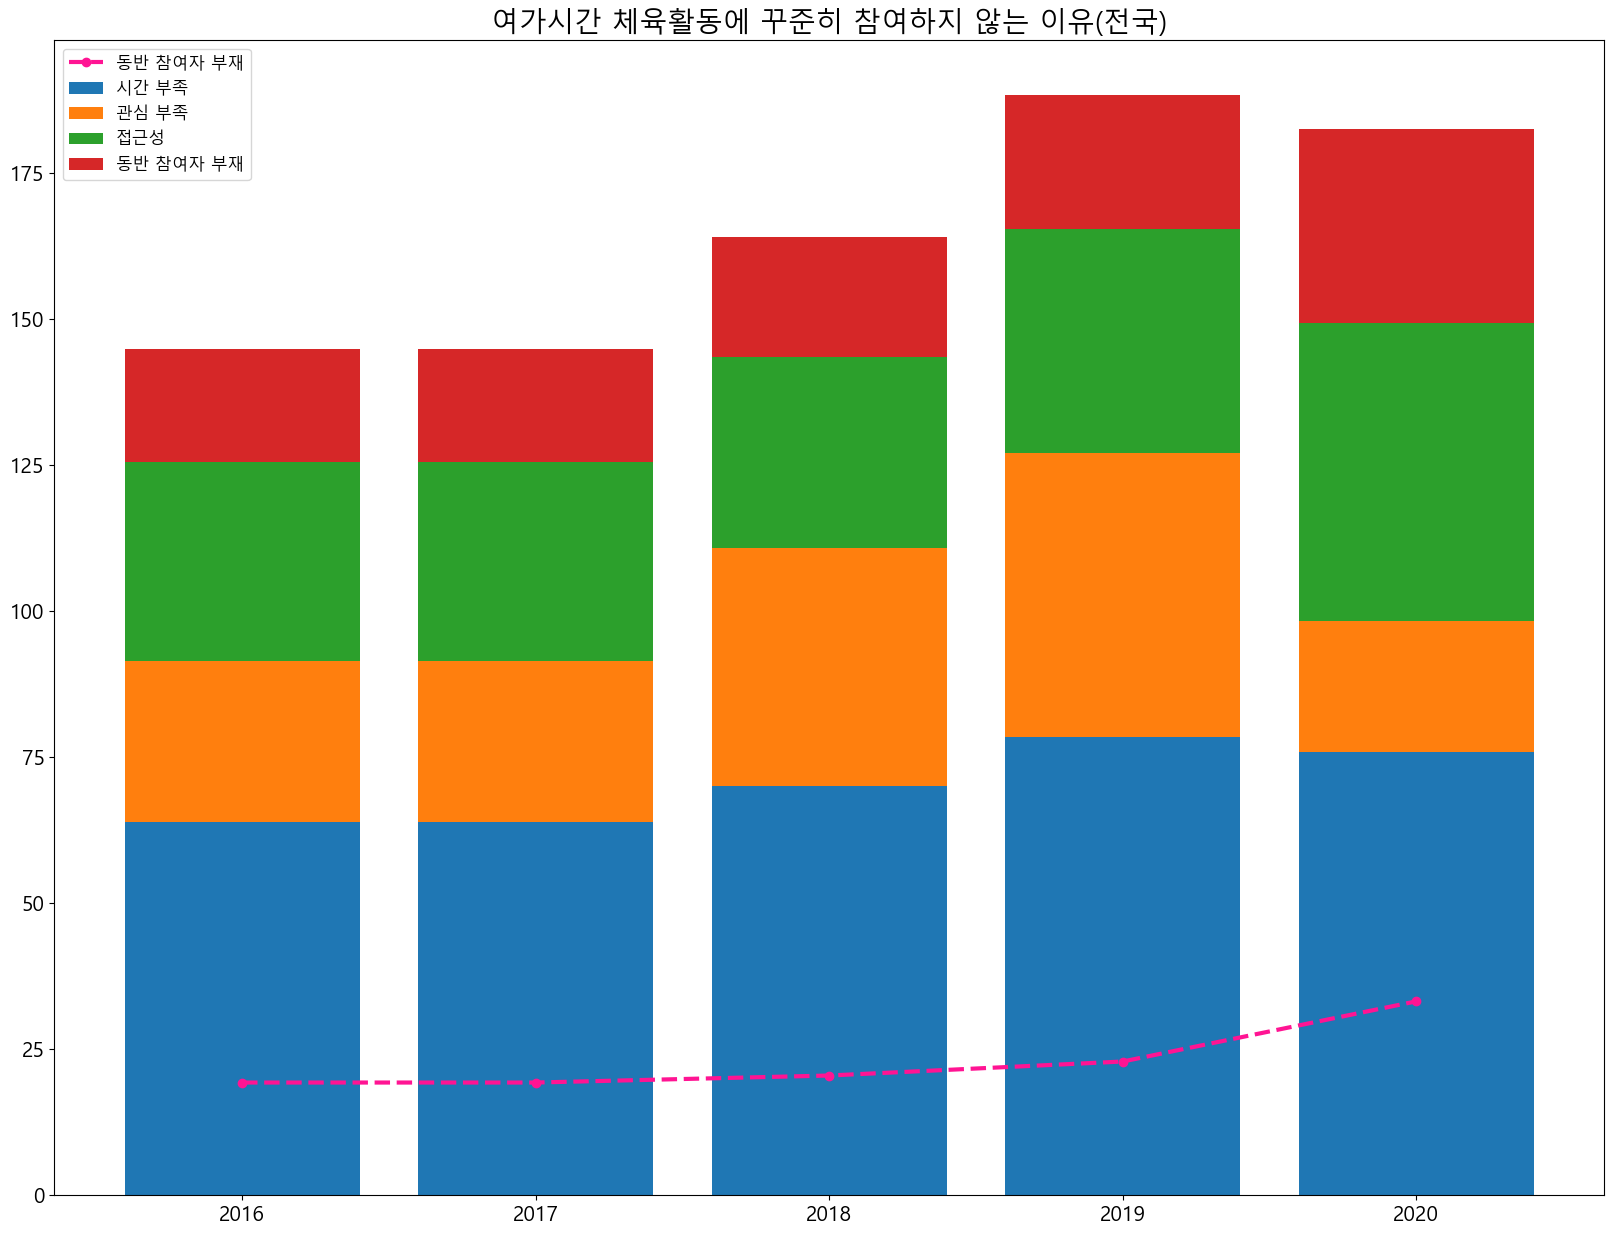

In [114]:
plt.figure(figsize=(20,15))

plt.bar(df_seoul_reason.columns.values, df_seoul_reason.loc['체육활동 가능시간 부족'], label = '시간 부족')
plt.bar(df_seoul_reason.columns.values, df_seoul_reason.loc['체육 활동에 대한 관심 부족'], label = '관심 부족', bottom = df_seoul_reason.loc['체육활동 가능시간 부족'])
plt.bar(df_seoul_reason.columns.values, df_seoul_reason.loc['체육시설 접근성 낮음'], label = '접근성', bottom = df_seoul_reason.loc['체육활동 가능시간 부족'] + df_seoul_reason.loc['체육 활동에 대한 관심 부족'])
plt.bar(df_seoul_reason.columns.values, df_seoul_reason.loc['동반 참여자 부재'], label = '동반 참여자 부재', bottom = df_seoul_reason.loc['체육활동 가능시간 부족']+ df_seoul_reason.loc['체육 활동에 대한 관심 부족']+df_seoul_reason.loc['체육시설 접근성 낮음'])
plt.plot(df_seoul_reason.columns.values, df_seoul_reason.loc['동반 참여자 부재'], 'o--', color = 'deeppink', linewidth = 3, label ='동반 참여자 부재')
plt.xticks(fontsize = 15)
plt.yticks(fontsize = 15)
plt.title('여가시간 체육활동에 꾸준히 참여하지 않는 이유(전국)', fontsize = 20)
plt.legend(fontsize=12)
plt.show()

In [115]:
df_seoul_reason

,2016,2017,2018,2019,2020
이유,,,,,
체육활동 가능시간 부족,63.9,63.9,70.1,78.4,75.9
체육 활동에 대한 관심 부족,27.5,27.5,40.7,48.7,22.4
체육시설 접근성 낮음,34.1,34.1,32.7,38.3,51.1
동반 참여자 부재,19.3,19.3,20.5,22.9,33.2
체육활동 지출비용 부담,24.7,24.7,28.5,25.4,22.3
체육에 소질이 없음,20.7,20.7,10.9,18.8,16.4
체육활동 정보 부족,15.1,15.1,13.0,17.3,18.9
소득수준 낮음,12.7,12.7,11.9,9.0,23.4
건강상의 문제,13.7,13.7,14.7,16.5,16.2


**체육시설 접근성 낮음** 값과 **동반 참여자 부재** 값이 최근 2020년 들어 값이 크게 증가한 것을 확인할 수 있다.  
참여이유 와 꾸준히 참여하지않는 이유를 보면 **즐거움 과 사교**를 위해 체육활동에 참여하지만  
**접근성 과 같이할 동반자**가 없어서 참여가 꾸준하지 못한 것을 알 수 있다.

이러한 데이터를 통해 우리는 **서울시에서 같이 체육활동을 할 사람을 찾아주는 서비스**를 제공할 것이다.